In [1]:
#import dependencies
import pandas as pd
import os
import numpy as np
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#name the current filepath
cwd = os.getcwd()
cwd

'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Projects\\ECHO-Marketing_git'

# iECHO (Attendance) Data

In [24]:
#name the filepath to the data
# former_file_path = "C:\\Users\\ssteffen\\Desktop\\Sam\\Email_data\\email_data.csv"
#to get the current file path, enter 'pwd' in GitBash terminal:
# /c/Users/ssteffen/University of Idaho/Storage-Boise - ECHO/Staff/Sam/Data
root_file_path = 'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Spreadsheets\\iECHO data\\' 
data_path_2018 = f'{root_file_path}2018_iECHO_data.csv' 
data_path_2019 = f'{root_file_path}2019_iECHO_data.csv' 
data_path_2020 = f'{root_file_path}2020_iECHO_data.csv' 
data_path_2021 = f'{root_file_path}2021_iECHO_data.csv' 
data_path_cumulative = f'{root_file_path}2018-2021_iECHO_attendance_data.csv'

# read the 2018-2021 data into separate dataframes
iecho_data_2018 = pd.read_csv(data_path_2018)
iecho_data_2019 = pd.read_csv(data_path_2019)
iecho_data_2020 = pd.read_csv(data_path_2020)
iecho_data_2021 = pd.read_csv(data_path_2021)
iecho_data_cumulative = pd.read_csv(data_path_cumulative)

# 2018 Attendance Data

In [25]:
#clean 2018 data in preparation for merging all the dfs into one

#list 2018 data column headers
print(iecho_data_2018.columns)

Index(['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'First Name',
       'Last Name', 'Date.1', 'Attendee Type', 'Job Title', 'Credentials',
       'Specialty', 'Attendee Street Address', 'Attendee City',
       'Attendee State', 'Attendee Zip Code', 'Attendee County',
       'Attendee Email 1', 'Attendee Email 2', 'Health Center Name',
       'Health Center Street Address', 'Health Center City',
       'Health Center State', 'Health Center Zip Code', 'Health Center County',
       'Unnamed: 24', 'Unnamed: 25', 'Unique Series (3)', '# of Sessions',
       'Unique Attendance by Series',
       '# of People who attended 2+ sessions in same series',
       'of 29 people who attended +1 ECHO series', 'Unique Part by County',
       '2018 total', 'Unnamed: 33', '232 Unique Participants', 'COUNTY',
       'Unnamed: 36', 'Sessions Attended', 'OPSUD', 'BHPC', 'XWAIV'],
      dtype='object')


In [26]:
#eliminate unnecessary columns
iecho_data_2018 = iecho_data_2018.drop(['Date.1',
                                        'First Name',
                                        'Last Name',
                                        'Unnamed: 24',
                                        'Unnamed: 25',
                                        'Unique Series (3)',
                                        '# of Sessions',
                                        'Unique Attendance by Series',
                                        '# of People who attended 2+ sessions in same series',
                                        'of 29 people who attended +1 ECHO series',
                                        'Unique Part by County',
                                        '2018 total',
                                        'Unnamed: 33',
                                        '232 Unique Participants',
                                        'COUNTY',
                                        'Unnamed: 36',
                                        'Sessions Attended',
                                        'OPSUD',
                                        'BHPC',
                                        'XWAIV'
                                       ], axis=1)

iecho_data_2018.head()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,...,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code,Health Center County
0,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Amy Hirtle,Attendee,Public Health Professional,CHW,NaN,8500 N Atlas Rd,Hayden,...,83835,Kootenai / 1,ahirtle@phd1.idaho.gov,NaN,Idaho Public Health District 1 (Panhandle),8500 N Atlas Rd,Hayden,ID,83835,Kootenai / 1
1,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Ann Watkins,Attendee,Public Health Professional,NaN,NaN,"450 W State St, PO Box 83720",Boise,...,83720-0036,Ada / 4,ann.watkins@dhw.idaho.gov,watkinsa@dhw.idaho.gov,Idaho Department of Health and Welfare - Main,"450 W State St, PO Box 83720",Boise,ID,83720-0036,Ada / 4
2,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Brittany Pope,Attendee,Healthcare Administrator,BS,NaN,215 10 St,Lewiston,...,83501,Nez Perce / 2,bpope@phd2.idaho.gov,NaN,Idaho Public Health District 2 (North Central),215 10 St,Lewiston,ID,83501,Nez Perce / 2
3,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Doris Ziegeldorf,Attendee,Nurse Practitioner,FNP-BC,"Hormone therapy, weight, fibromyalgia, women’s...",1522 17 St,Lewiston,...,83501,Nez Perce / 2,ladynp1995@hotmail.com,dziegeldorf@tsmh.org,Clearwater Medical Clinic,1522 17 St,Lewiston,ID,83501,Nez Perce / 2
4,3/15/2018,"Opioids, Pain, and Substance Use Disorders",ECHO for Addressing Opioid Addiction and Treat...,Doug Whatmore,Attendee,Physician,MD,"Internal Medicine, Cardiology, Critical Care M...",165 E Harvest Run Cir,Idaho Falls,...,83404,Bonneville / 7,Doug.whatmore@hcahealthcare.com,docwot@cableone.net,Eastern Idaho Regional Medical Center,165 E Harvest Run Cir,Idaho Falls,ID,83404,Bonneville / 7


In [27]:
# view the data
iecho_data_2018.describe()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,...,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code,Health Center County
count,771,771,771,771,771,771,676,188,771,771,...,771,771,731,151,771,766,771,771,771,771
unique,27,3,27,232,2,17,69,55,125,51,...,71,39,209,31,101,98,47,11,63,38
top,12/10/2018,"Opioids, Pain, and Substance Use Disorders",MAT Waiver Training,Lachelle Smith,Attendee,Other - Not Pt. Care,MD,"Primary care integration, depression, anxiety,...",322 E Front St,Boise,...,83501,Ada / 4,lachellesmith@uidaho.edu,kirsten.rosin@phd3.idaho.gov,University of Idaho - Boise,322 E Front St,Boise,ID,83702,Ada / 4
freq,69,415,69,26,657,169,104,17,95,271,...,92,331,26,17,118,121,257,749,145,315


### Fill in Empty Values with NaNs

In [28]:
#print the column titles as a list
# print(iecho_data_2018.columns)

#add the list to the .apply method to fill in missing data with NaNs
iecho_data_2018 = iecho_data_2018[['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'Attendee Type',
       'Job Title', 'Credentials', 'Specialty', 'Attendee Street Address',
       'Attendee City', 'Attendee State', 'Attendee Zip Code',
       'Attendee County', 'Attendee Email 1', 'Attendee Email 2',
       'Health Center Name', 'Health Center Street Address',
       'Health Center City', 'Health Center State', 'Health Center Zip Code',
       'Health Center County']].apply(lambda x: x.str.strip()).replace('', np.nan)

iecho_data_2018['Clinic Name'].value_counts()

Opioids, Pain, and Substance Use Disorders    415
Behavioral Health in Primary Care             287
X-Waiver Training                              69
Name: Clinic Name, dtype: int64

### Change the Series Names

In [29]:
#change the series data to match the terms of email_data in preparation for a merge
# iecho_data_2018['Clinic Name'].value_counts()

#change 'Opioids, Pain, and Substance Use Disorders' to 'OPSUD'
iecho_data_2018['Clinic Name'] = iecho_data_2018['Clinic Name'].apply(lambda x: x.strip()).replace('Opioids, Pain, and Substance Use Disorders', 'OPSUD')

#change 'Behavioral Health in Primary Care' to 'BH in PC'
iecho_data_2018['Clinic Name'] = iecho_data_2018['Clinic Name'].apply(lambda x: x.strip()).replace('Behavioral Health in Primary Care', 'BH in PC')

#change 'X-Waiver Training' to 'XWT'
iecho_data_2018['Clinic Name'] = iecho_data_2018['Clinic Name'].apply(lambda x: x.strip()).replace('X-Waiver Training', 'XWT')

iecho_data_2018['Clinic Name'].value_counts()

#create a df that will show the attendance count by session


OPSUD       415
BH in PC    287
XWT          69
Name: Clinic Name, dtype: int64

### Create a Session Attendance Dataframe

In [30]:
#create a new df that shows each session topic by series, date, and attendance per session
session_topics_2018 = iecho_data_2018[['Clinic Name', 'Session Topic', 'Full Name','Date']]
session_attendance_raw = session_topics_2018.groupby(['Clinic Name', 'Session Topic', 'Date'])['Full Name'].count()
session_attendance_2018_df = pd.DataFrame(session_attendance_raw)
#change the name of the 'Full Name' count to 'Attendance'
session_attendance_2018_df.rename(columns = {'Full Name':'Attendance'}, inplace=True)

#reset the index
session_attendance_2018_df.reset_index(inplace=True)

session_attendance_2018_df

,Clinic Name,Session Topic,Date,Attendance
0,BH in PC,"Boundaries, Therapeutic Modalities, and Therap...",11/14/2018,30
1,BH in PC,Co-Occurring Disorders,10/17/2018,37
2,BH in PC,Common Interactions and Dosage Considerations ...,11/28/2018,30
3,BH in PC,Gender Dysphoria,10/3/2018,45
4,BH in PC,Geriatric Psychiatry and Considerations in the...,10/31/2018,30
5,BH in PC,Mood Disorders,9/19/2018,40
6,BH in PC,Perinatal Mood Disorders,12/12/2018,26
7,BH in PC,Somatic Symptom and Related Disorders,9/5/2018,49
8,OPSUD,Acupuncture,11/8/2018,16
9,OPSUD,Addiction Treatment Overview,6/7/2018,21


### Convert the Datatypes

In [31]:
#change the data types of inappropriate datatypes, if necessary
# session_attendance_2018_df.dtypes
session_attendance_2018_df['Date'] = pd.to_datetime(session_attendance_2018_df['Date'], format='%m/%d/%Y')
# session_attendance_2018_df.dtypes

#reorder the df
session_attendance_2018_df = session_attendance_2018_df.sort_values(by='Date')

### Plot the 2018 Attendance Totals

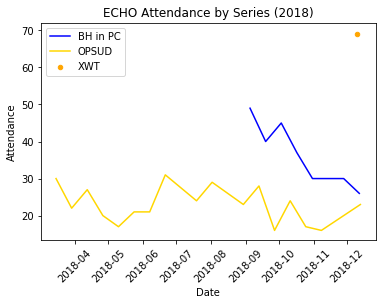

In [32]:
#plot the 2018 session attendance data using a multi-line graph

#slice the 2018 df by series
BH_PC_attendance_2018 = session_attendance_2018_df.loc[(session_attendance_2018_df['Clinic Name'] == 'BH in PC')]
bhpc_date_2018 = BH_PC_attendance_2018['Date'].to_list()
bhpc_attendance_2018 = BH_PC_attendance_2018['Attendance'].to_list()

OPSUD_attendance_2018 = session_attendance_2018_df.loc[(session_attendance_2018_df['Clinic Name'] == 'OPSUD')]
OPSUD_date_2018 = OPSUD_attendance_2018['Date'].to_list()
OPSUD_attendance_2018 = OPSUD_attendance_2018['Attendance'].to_list()

XWT_attendance_2018 = session_attendance_2018_df.loc[(session_attendance_2018_df['Clinic Name'] == 'XWT')]
XWT_date_2018 = XWT_attendance_2018['Date'].to_list()
XWT_attendance_2018 = XWT_attendance_2018['Attendance'].to_list()
  
# plot lines
plt.plot(bhpc_date_2018, bhpc_attendance_2018, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2018, OPSUD_attendance_2018, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2018, XWT_attendance_2018, label = "XWT", s=20, color='orange')
plt.title("ECHO Attendance by Series (2018)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend()

plt.show()